In [87]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [88]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

# Opinion Evolution in network with bias function in R and M

In [102]:
import random
# -------------- Define dictionaries to store unique values for each pair of nodes -------------
# Unique sigma value for each pair
sigma_values = {}

back_values = {}

# Unique influence value for each pair
influence_values = {}

def get_unique_random_sigma_for_pair(e):
    if e not in sigma_values:
        sigma_values[e] = random.randrange(1,4)
    return sigma_values[e]

def get_unique_random_back_for_pair(e):
    if e not in back_values:
        back_values[e] = -1 * random.uniform(1, 2)
    return back_values[e]

def get_unique_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def get_unique_random_influence_consensus_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1 / sigma_values[e])
    return influence_values[e]

# ------------------------- Definition of bias functions -------------------------

# I region
def ins(G,e):
    return 0

# if sigma between 0 and 1, lin is in R, else if sigma > 1, lin is in M
def lin(G, e):
    sigma = get_unique_random_sigma_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return sigma * x

# R region
def conf(G, e):
    delta = 0.01
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x*(1 + delta - abs(x))/(1+delta)

# M region
def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

# B region
def neg_lin(G, e):
    back = get_unique_random_back_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return back * x 

# B region
def backf(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return -(x ** 3)

# ------------------------- Definition of influence functions -------------------------

def random_inf(G, e):
    return get_unique_random_influence_for_pair(e)

def random_inf_consensus(G, e):
    return get_unique_random_influence_consensus_for_pair(e)

### Opinion evolution with linear bias function in R and M

True


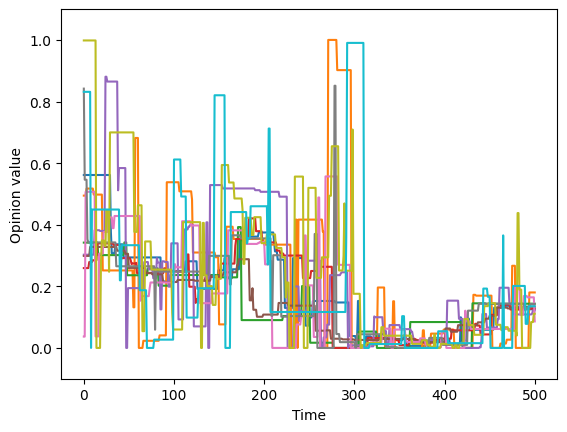

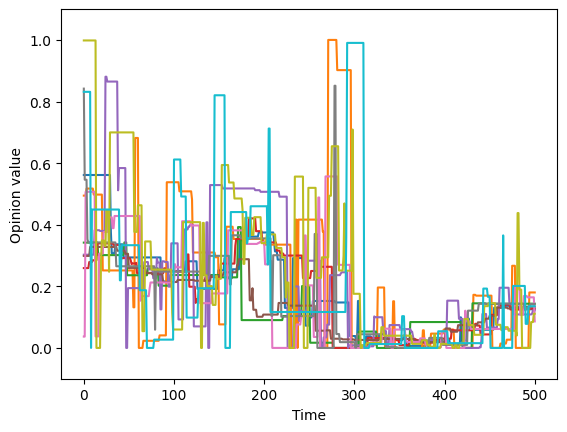

In [108]:
n = 10
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Opinion evolution with linear bias function in R and M. $\sigma_{ji} \cdot I_{ij} < 1$. For every $\sigma_{ji} \in (0,1)$ the condition will always fulfilled, this is for every linear function in R.

True


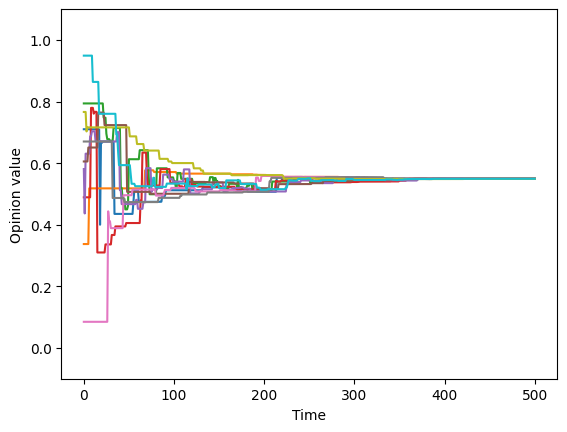

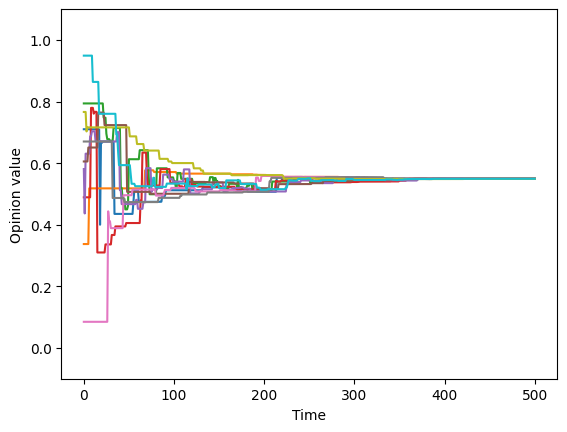

In [111]:
n = 10
p = 0.4
B0 = []

sigma_values = {}
influence_values = {}

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf_consensus,bias_fn=lin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Opinion evolution with linear function (Regions R and M) and ins function (I)

Erdös-Renyi Graph with a random value of $I_{ij}$ and a random bias function between $ins$ and $lin$. 

In [112]:
bias_fn = {}
influence_values = {}

def random_lin_ins(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e not in bias_fn:
        bias_fn[e] = random.choices([lin, ins])[0]
    
    return bias_fn[e](G,e)

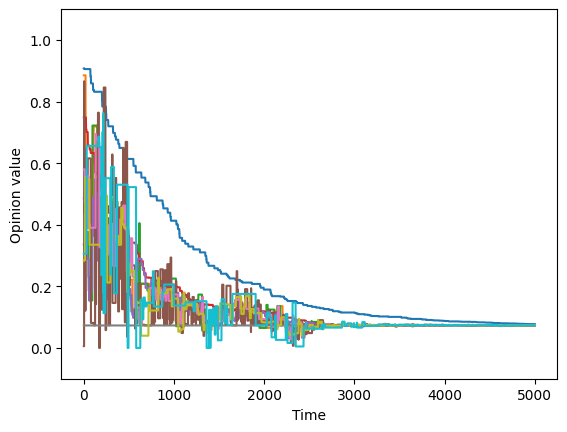

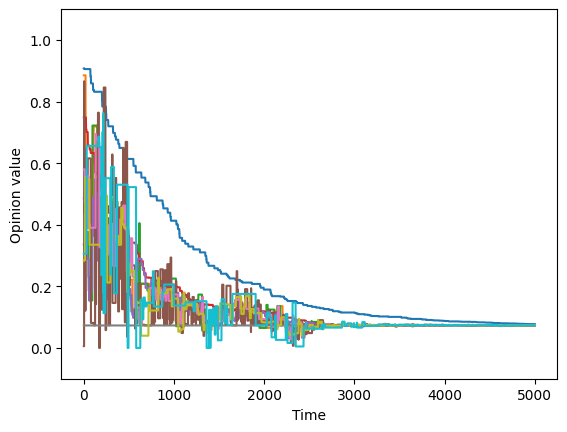

In [120]:
n = 10
p = 0.4
B0 = []

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=random_lin_ins)

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

Creating a strongly connected graph with agents wit bias function $lin$, where $\sigma_{ji} \cdot I_{ij} < 1$. Then, we complete the graph where the missing connections will have the $ins$ bias function.

In [121]:
n = 10
p = 0.4

# Create graph
graph=nx.fast_gnp_random_graph(n, p, directed=True)
edges = graph.edges()

# Generate complete graph
k = nx.complete_graph(n,create_using=nx.DiGraph)
all_edges = k.edges()

# Find missing edges
missing_edges =  list(set(all_edges) - set(edges))

In [122]:
def lin_ins(G, e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    if e in edges:
        sigma = get_unique_random_sigma_for_pair(e)
        return sigma * x
    else:
        return 0
    
def get_unique_random_influence_for_pair_li(e):
    if e not in influence_values and e in edges:
        influence_values[e] = random.uniform(0, 1 / sigma_values[e])
    elif e not in influence_values:
        influence_values[e] = random.uniform(0, 1)
    return influence_values[e]

def random_inf_li(G, e):
    return get_unique_random_influence_for_pair_li(e)


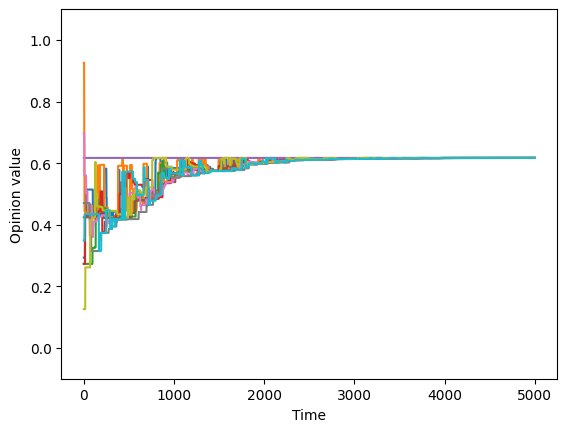

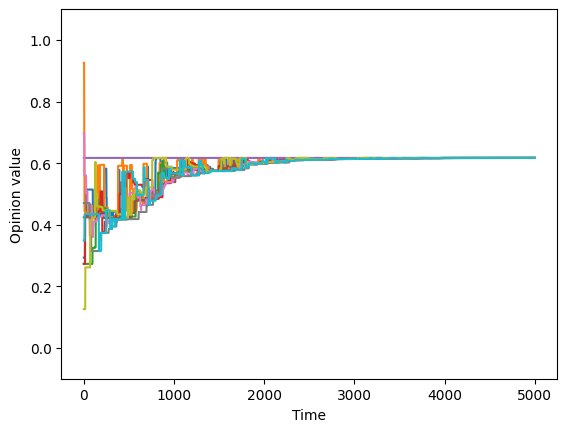

In [127]:
sigma_values = {}
influence_values = {}

B0 = []

G = BiasedInfluenceGraph(n,G=k, ops=B0, influence_fn=random_inf_li,bias_fn=lin_ins)

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

## Opinion Evolution with bias function in all regions

In [ ]:
funcs = [ins, lin, conf, fan, neg_lin, backf]

def random_bias_fun(G,e):
    if e not in bias_fn:
        bias_fn[e] = random.choices(funcs)[0]
    return bias_fn[e](G,e)

Is not possible to guarantee consensus, due to closed-minded agents that could "break" the connectivity of the network or due to backfire agents that tends to distance their opinion from another agents

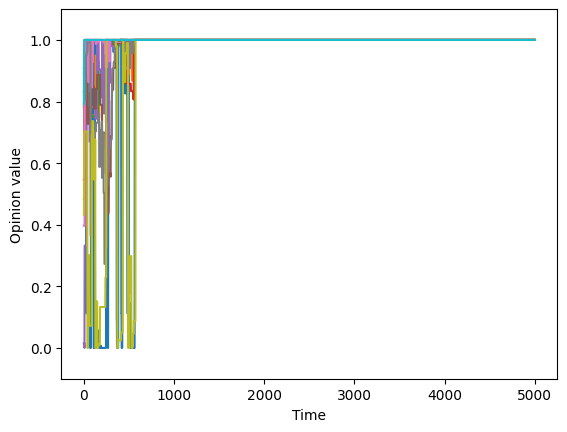

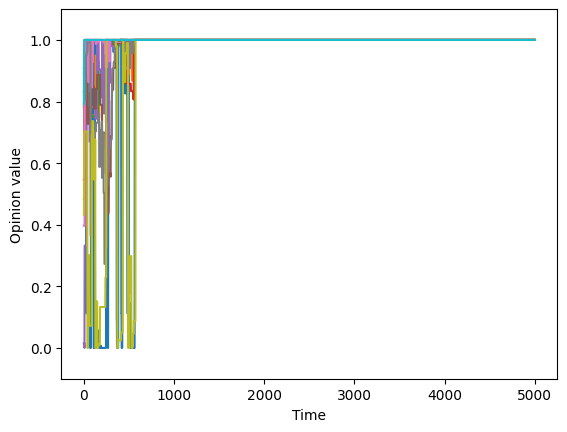

In [179]:
bias_fn = {}
influence_values = {}

B0 = []
n = 10
p = 0.4

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n,p), ops=B0, influence_fn=random_inf,bias_fn=random_bias_fun)

word_len = 500*n
w = generate_random_word(G, word_len)
G.execute_word(w)

G.plot_opinion_evolution()

Study of impact of agents with bias function in B

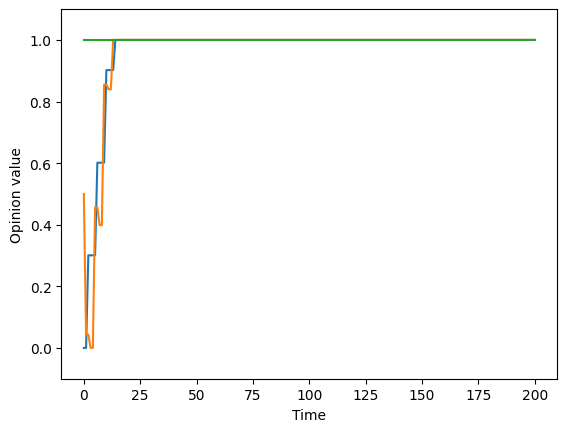

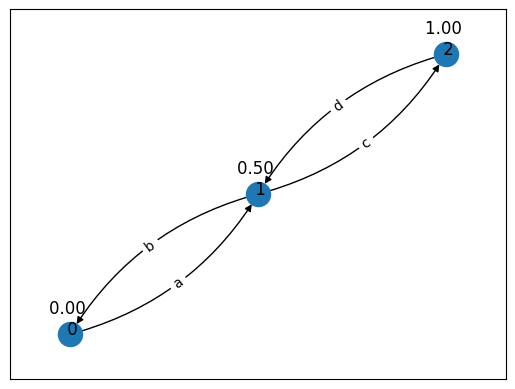

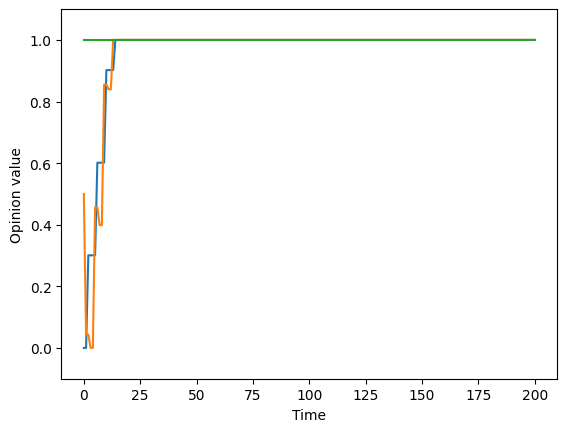

In [301]:
bias_fn = {(0, 1): fan,
 (1, 0): fan,
 (2, 1): neg_lin,
 (1, 2): ins}

influence_values = {(0, 1): 0.4565957981519907,
 (1, 0): 0.3006896734555903,
 (2, 1): 0.09709986953652128,
 (1, 2): 0.8375213415522689}

sigma_values = {}
back_values = {(2,1) : -1.1}#-7.9146608663521}

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=random_inf, bias_fn=random_bias_fun)
nodes = 3

G.draw()

w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

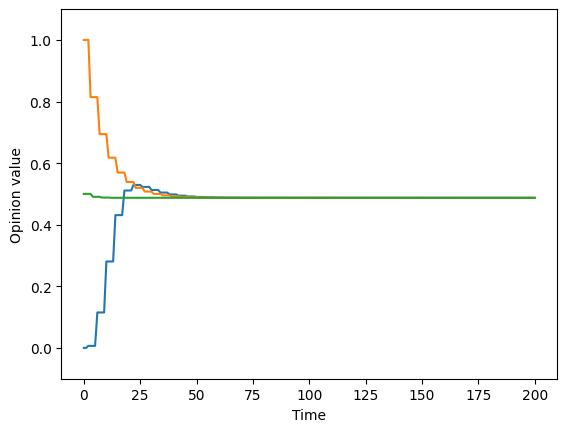

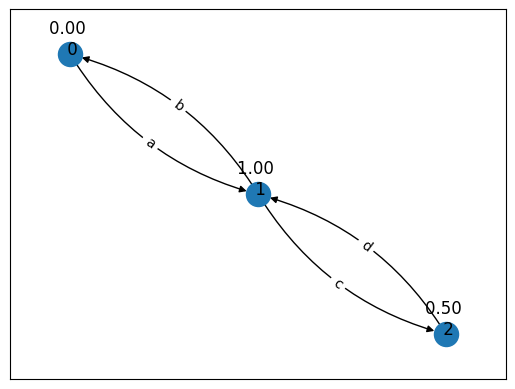

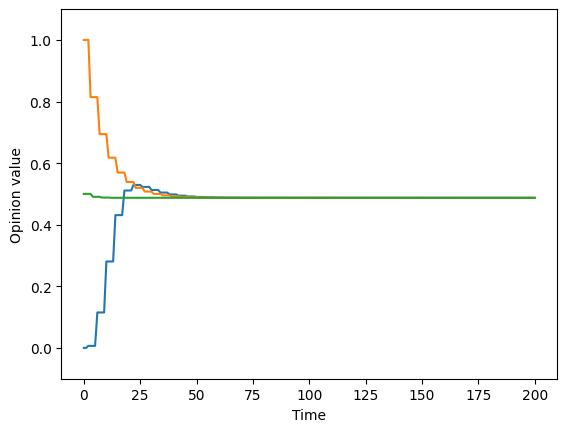

In [322]:
bias_fn = {(0, 1): ins,
 (1, 0): conf,
 (2, 1): lin,
 (1, 2): backf}
influence_values = {(0, 1): 0.4318341430791075,
 (1, 0): 0.6702704052344682,
 (2, 1): 0.18568849676399424,
 (1, 2): 0.3011851509192067}
sigma_values = {(2, 1):2}
back_values = {}

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

G = BiasedInfluenceGraph(4, ops=[0,1,0.5], G=g, influence_fn=random_inf, bias_fn=random_bias_fun)
nodes = 3

G.draw()

w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

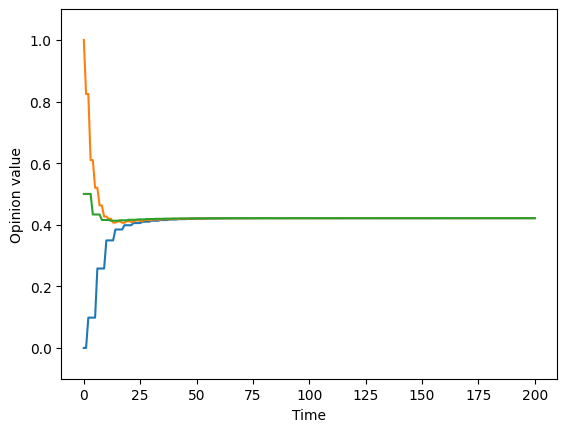

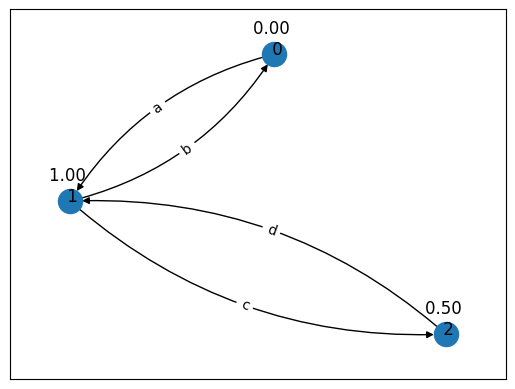

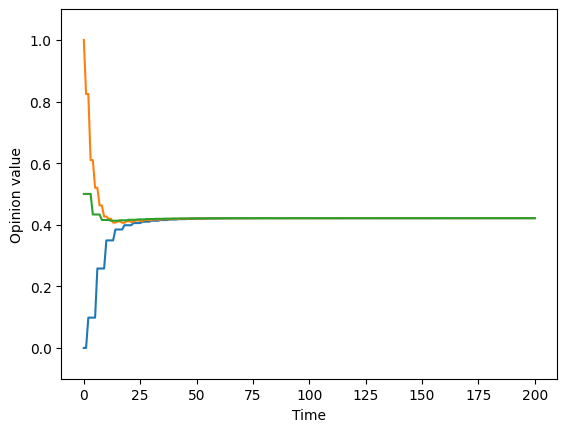

In [ ]:
bias_fn = {(0, 1): lin,
 (1, 0): conf,
 (2, 1): lin,
 (1, 2): neg_lin}
influence_values = {(0, 1): 0.17553161566641007,
 (1, 0): 0.6492071975995961,
 (2, 1): 0.6617078303233567,
 (1, 2): 0.5725137476235982}
sigma_values = {(0, 1): 1, (2, 1): 1}
back_values = {(1, 2): -1.0625062234428078}

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

G = BiasedInfluenceGraph(4, ops=[0,1,0.5], G=g, influence_fn=random_inf, bias_fn=random_bias_fun)
nodes = 3

G.draw()
    
w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

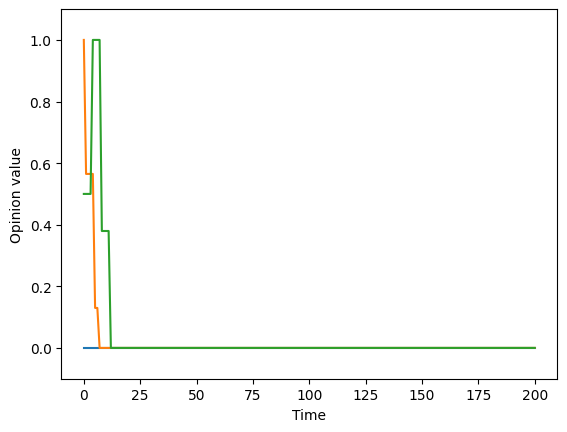

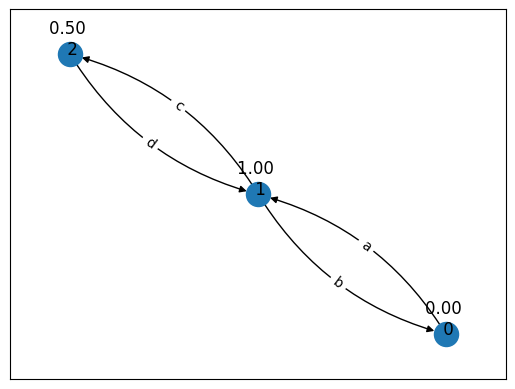

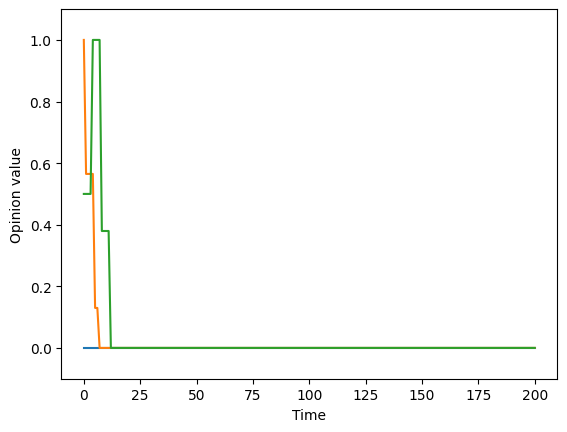

In [336]:
bias_fn = {(0, 1): fan,
 (1, 0): backf,
 (2, 1): backf,
 (1, 2): fan}
influence_values = {(0, 1): 0.43510330429025457,
 (1, 0): 0.20933743443558273,
 (2, 1): 0.20088436611240756,
 (1, 2): 0.6203627720714678}
sigma_values = {}
back_values = {}

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

G = BiasedInfluenceGraph(4, ops=[0,1,0.5], G=g, influence_fn=random_inf, bias_fn=random_bias_fun)
nodes = 3

G.draw()
    
w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

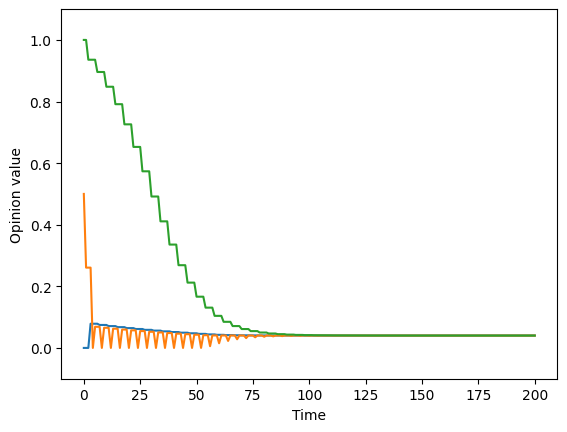

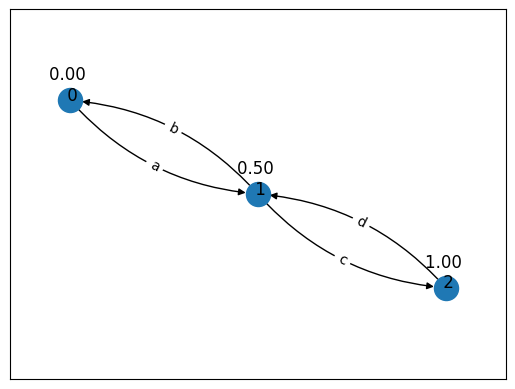

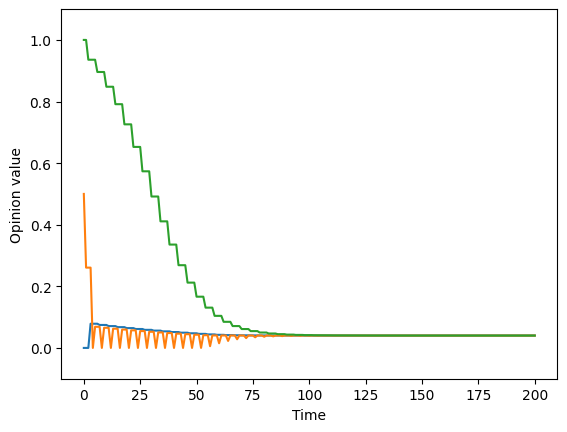

In [372]:
bias_fn = {(0, 1): conf,
 (1, 2): conf,
 (1, 0): conf,
 (2, 1): neg_lin}
influence_values = {(0, 1): 0.9477623650361767,
 (1, 2): 0.3244689758275231,
 (1, 0): 0.40604179280592434,
 (2, 1): 0.2108634657761066}
sigma_values = {}
back_values = {(2,1): -1.89}

g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

G = BiasedInfluenceGraph(3, ops=[0,0.5,1], G=g, influence_fn=random_inf, bias_fn=random_bias_fun)
nodes = 3

G.draw()
    
w = "acbd"*50
G.execute_word(w)

G.plot_opinion_evolution()

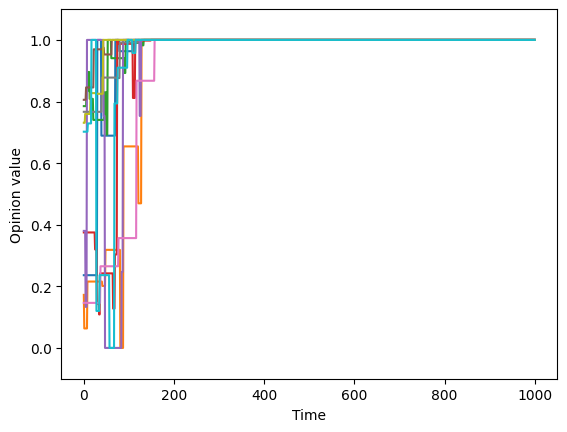

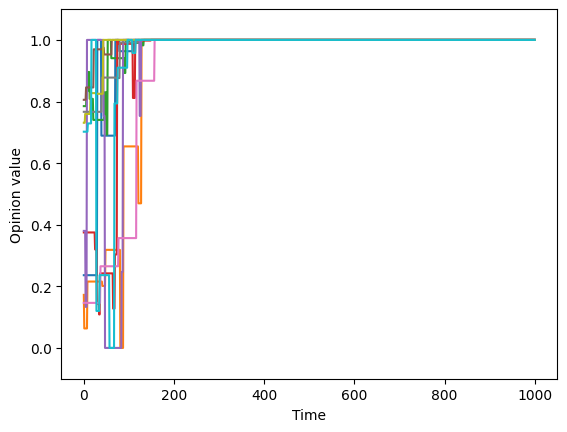

In [407]:
bias_fn = {}
influence_values = {}
sigma_values = {}
back_values = {}

n = 10
p = 0.4

G = BiasedInfluenceGraph(n, ops=[], G=nx.fast_gnp_random_graph(n, p), influence_fn=random_inf, bias_fn=random_bias_fun)
    
w = generate_kfair_word(G, 1000,G.number_of_edges())
G.execute_word(w)

G.plot_opinion_evolution()

In [408]:
bias_fn

{(3, 1): <function __main__.neg_lin(G, e)>,
 (2, 5): <function __main__.backf(G, e)>,
 (9, 8): <function __main__.neg_lin(G, e)>,
 (3, 4): <function __main__.fan(G, e)>,
 (8, 5): <function __main__.neg_lin(G, e)>,
 (3, 2): <function __main__.backf(G, e)>,
 (9, 4): <function __main__.lin(G, e)>,
 (6, 1): <function __main__.lin(G, e)>,
 (3, 9): <function __main__.backf(G, e)>,
 (8, 2): <function __main__.neg_lin(G, e)>,
 (7, 1): <function __main__.ins(G, e)>,
 (4, 2): <function __main__.ins(G, e)>,
 (5, 2): <function __main__.lin(G, e)>,
 (0, 5): <function __main__.ins(G, e)>,
 (2, 8): <function __main__.lin(G, e)>,
 (2, 0): <function __main__.ins(G, e)>,
 (4, 9): <function __main__.fan(G, e)>,
 (8, 4): <function __main__.neg_lin(G, e)>,
 (5, 4): <function __main__.ins(G, e)>,
 (2, 4): <function __main__.backf(G, e)>,
 (0, 2): <function __main__.conf(G, e)>,
 (6, 5): <function __main__.backf(G, e)>,
 (7, 8): <function __main__.ins(G, e)>,
 (4, 5): <function __main__.backf(G, e)>,
 (5, 3)

In [409]:
influence_values

{(3, 1): 0.5225640229635659,
 (2, 5): 0.44463428582297704,
 (9, 8): 0.720192028537362,
 (3, 4): 0.24673660124958519,
 (8, 5): 0.6015068147520138,
 (3, 2): 0.7243428380236107,
 (9, 4): 0.9501297982569421,
 (6, 1): 0.6115985271239229,
 (3, 9): 0.7673130921550557,
 (8, 2): 0.4949905054846261,
 (7, 1): 0.8804232217835792,
 (4, 2): 0.3733588776653277,
 (5, 2): 0.5791041022820596,
 (0, 5): 0.6332570627242935,
 (2, 8): 0.6896073913003845,
 (2, 0): 0.30464373328249184,
 (4, 9): 0.8017846957168611,
 (8, 4): 0.590545555401845,
 (5, 4): 0.018250576304736477,
 (2, 4): 0.3945734029084226,
 (0, 2): 0.2756035141253972,
 (6, 5): 0.3617245216110391,
 (7, 8): 0.9104806889045779,
 (4, 5): 0.19594020466480022,
 (5, 3): 0.26278381771144665,
 (3, 5): 0.14732546201500407,
 (5, 8): 0.7148658530761777,
 (0, 9): 0.3839643255571149,
 (1, 3): 0.17593399090359663,
 (5, 0): 0.7481770343261552,
 (4, 8): 0.04644914086761631,
 (8, 7): 0.851424284359784,
 (4, 3): 0.17261271586336502,
 (9, 3): 0.7422292857344406,
 (8, 9

In [410]:
sigma_values

{(9, 4): 2,
 (6, 1): 3,
 (5, 2): 3,
 (2, 8): 2,
 (0, 9): 3,
 (5, 0): 2,
 (9, 3): 2,
 (2, 3): 1,
 (1, 6): 2,
 (9, 0): 3}

In [411]:
back_values

{(3, 1): -1.028894975161383,
 (9, 8): -1.3723241720957353,
 (8, 5): -1.4504292293846657,
 (8, 2): -1.6310485638750691,
 (8, 4): -1.440660907807231}

In [447]:
G.history[0]
i += 1
print(max(G.history[i-1]), min(G.history[i-1]))
print(max(G.history[i]), min(G.history[i]))

1 0.1201212323055516
1 0.1201212323055516
